# Classification

## EDA: Exploration et Visualisation de nos données

Dans ce chapitre, vous travaillerez avec un jeu de données obtenu à partir du référentiel UCI Machine Learning, constitué des votes effectués par les membres de la Chambre des représentants des États-Unis. Votre objectif sera de prédire leur affiliation politique ("démocrate" ou "républicain") en fonction de la manière dont ils ont voté sur certaines questions clés. À noter ici que nous avons pré-traité cet ensemble de données pour traiter les valeurs manquantes. Cela vous permettra de comprendre comment former et évaluer des modèles d'apprentissage supervisé. Une fois que vous maîtriserez ces principes de base, vous serez initié aux techniques de prétraitement au chapitre 4 et aurez la chance de les appliquer vous-même, y compris sur ce même jeu de données!

In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('votes.csv')

In [58]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


1. On va remplacer les valeurs n et y par 0 et 1 respectivement pour préparer nos données pour la classification:

In [59]:
df.replace({'n': 0}, inplace=True)

In [60]:
df.replace({'y': 1}, inplace=True)

In [61]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


2. On va se débarasser des colonnes ou on a la valeur '?'

In [ ]:
df.drop(df.loc[df['infants']=='?'].index, inplace=True)

In [65]:
def dropwithvalue(value, liste):
    for elt in liste:
        df.drop(df.loc[df[elt]==value].index, inplace=True)

In [66]:
liste = df.columns
print(liste)
dropwithvalue('?', liste)

Index(['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'],
      dtype='object')


In [67]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


3. On va explorer nos données

In [68]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [69]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1
freq,124,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


## Visual EDA

In [71]:
!pip install seaborn

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Dans sns.countplot (), nous spécifions que les données de l'axe x doivent être 'education' et que teinte doit être 'party'. Rappelez-vous que «parti» est également notre variable cible. Le graphique qui en résulte montre donc la différence de comportement de vote entre les deux partis pour le projet de loi «Éducation», chaque parti étant coloré différemment.

Il semble que les démocrates aient voté de manière catégorique contre ce projet de loi, comparé aux républicains. C'est le type d'informations que notre modèle d'apprentissage automatique cherchera à apprendre lorsque nous tenterons de prédire l'affiliation à un parti uniquement sur la base du comportement de vote. Un expert en politique américaine peut peut-être prédire cela sans apprentissage automatique, mais probablement pas instantanément - et certainement pas si nous avons affaire à des centaines d’échantillons!

Dans le shell IPython, explorez plus avant le comportement de vote en générant des graphes de dépouillement pour les projets de loi "satellite" et "pour les missiles", et répondez à la question suivante: Parmi ces deux projets de loi, pour lesquels les démocrates votent-ils résolument en faveur des républicains? Assurez-vous de commencer vos relevés graphiques pour chaque figure avec plt.figure () afin qu'une nouvelle figure soit configurée. Sinon, vos parcelles seront superposées sur la même figure.

In [74]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

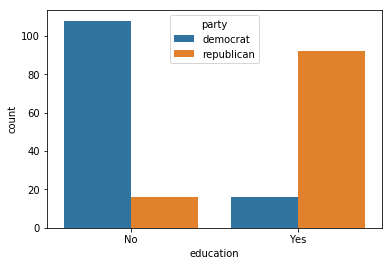

In [77]:
plt.figure()
sns.countplot(x='education', hue='party', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

- Les démocrates ont voté Non pour éducation au contraire des républicains.

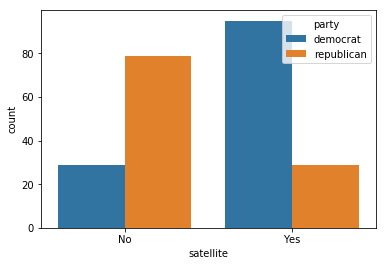

In [78]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

- Les démocrates ont voté Oui pour satellite au contraire des républicains.

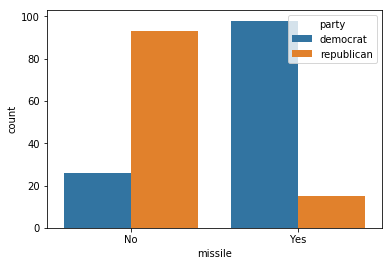

In [79]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

- Les démocrates ont voté Oui pour missile au contraire des républicains.

## K-Nearest Neighbors

On va appliquer un algorithme pour faire notre prédiction

### Fit

In [80]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### Predict

In [84]:
X_new = [0.162695, 0.17925, 0.998741, 0.983378, 0.903882, 0.031269, 0.997821, 0.990385, 0.328347,0.294335 ,0.29697 ,0.291189,0.33943,0.217645    
,0.60725, 0.973397]

X_new = pd.DataFrame([X_new])

In [85]:
X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.162695,0.17925,0.998741,0.983378,0.903882,0.031269,0.997821,0.990385,0.328347,0.294335,0.29697,0.291189,0.33943,0.217645,0.60725,0.973397


In [86]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


### Measuring Performance

On va utiliser MNIST dataset

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

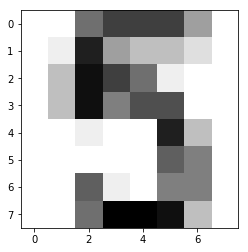

In [91]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

In [88]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### Overfitting and underfitting

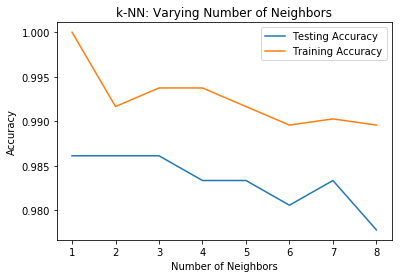

In [93]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Il semble que la précision du test soit maximale lorsqu'on utilise 3 et 5 voisins. L'utilisation de 8 voisins ou plus semble résulter en un modèle simple qui sous-exploite les données.

# Regression

## Importing data for supervised learning

Dans ce chapitre, vous allez utiliser les données Gapminder que nous avons consolidées dans un fichier CSV disponible dans l’espace de travail sous le nom «gapminder.csv». Plus précisément, votre objectif sera d'utiliser ces données pour prédire l'espérance de vie dans un pays donné en fonction de caractéristiques telles que le PIB du pays, le taux de fécondité et la population. Comme au chapitre 1, le jeu de données a été prétraité.

La variable cible étant ici quantitative, il s'agit d'un problème de régression. Pour commencer, vous allez adapter une régression linéaire à une seule caractéristique: la «fécondité», qui est le nombre moyen d'enfants qu'une femme d'un pays donné donne naissance. Dans les exercices suivants, vous utiliserez toutes les fonctionnalités pour créer des modèles de régression.

Avant cela, toutefois, vous devez importer les données et les obtenir sous la forme requise par scikit-learn. Cela implique la création de tableaux de variables de caractéristiques et cibles. De plus, comme vous allez utiliser une seule fonctionnalité pour commencer, vous devez procéder à un remodelage à l'aide de la méthode .reshape () de NumPy. Ne vous inquiétez pas trop de cette refonte en ce moment, mais c’est quelque chose que vous devrez faire de temps en temps lorsque vous travaillez avec scikit-learn, il est donc utile de vous entraîner.

In [143]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


## Exploring the Gapminder data

Comme toujours, il est important d’explorer vos données avant de créer des modèles. À droite, nous avons construit une carte thermique montrant la corrélation entre les différentes fonctionnalités du jeu de données Gapminder, qui a été préchargée dans un DataFrame en tant que df et qui est disponible pour une exploration dans le shell IPython. Les cellules en vert montrent une corrélation positive, tandis que les cellules en rouge indiquent une corrélation négative. Prenez un moment pour explorer ceci: quelles sont les caractéristiques corrélées positivement avec la vie et lesquelles sont négativement corrélées? Cela correspond-il à votre intuition?

Ensuite, dans le shell IPython, explorez le DataFrame à l’aide de méthodes telles que .info (), .describe (), .head ().

Si vous êtes curieux, la heatmap a été générée à l'aide de la fonction heatmap de Seaborn et de la ligne de code suivante, où df.corr () calcule la corrélation par paires entre les colonnes:

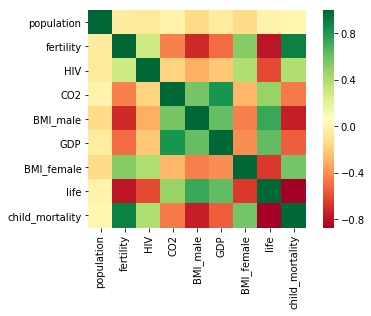

In [144]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [146]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [147]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


## Fit & predict for regression

Vous allez maintenant ajuster une régression linéaire et prédire l'espérance de vie en utilisant une seule fonctionnalité. Vous avez vu Andy le faire plus tôt en utilisant la fonctionnalité 'RM' de l'ensemble de données sur le logement de Boston. Dans cet exercice, vous utiliserez la fonctionnalité «fertilité» du jeu de données Gapminder. Puisque l'objectif est de prédire l'espérance de vie, la variable cible ici est la «vie». Le tableau de la variable cible a été préchargé sous la forme y et celui de 'fertilité' sous la forme X_fertility.

Un nuage de points avec 'fertilité' sur l'axe des x et 'vie' sur l'axe des y a été généré. Comme vous pouvez le constater, il existe une corrélation fortement négative. Une régression linéaire devrait donc permettre de saisir cette tendance. Votre travail consiste à ajuster une régression linéaire, puis à prédire l’espérance de vie, en superposant ces valeurs prédites sur le graphique pour générer une ligne de régression. Vous calculerez et imprimerez également le score R2 à l'aide de la méthode .score () de sckit-learn.

In [148]:
X_fertility = (df['fertility'].values).reshape(-1, 1)

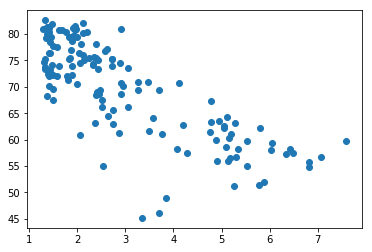

In [149]:
plt.scatter(x=df['fertility'], y=df['life'])

0.6192442167740035


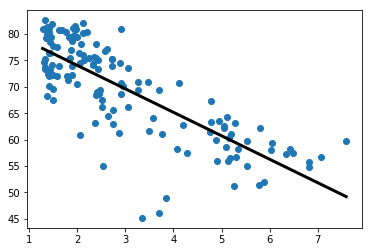

In [150]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

plt.scatter(x=df['fertility'], y=df['life'])
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

## Train/test split for regression

In [151]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


## Cross-Validation

La validation croisée est une étape essentielle dans l'évaluation d'un modèle. Il maximise la quantité de données utilisée pour former le modèle, car au cours de la formation, le modèle est non seulement formé, mais également testé sur toutes les données disponibles.

Dans cet exercice, vous allez pratiquer une validation croisée de 5 fois sur les données de Gapminder. Par défaut, la fonction cross_val_score () de scikit-learn utilise R2 comme métrique de choix pour la régression. Puisque vous effectuez une validation croisée 5 fois, la fonction renvoie 5 scores. Votre travail consiste à calculer ces 5 scores puis à prendre leur moyenne

In [152]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


### K-Fold CV comparison

La validation croisée est essentielle, mais n'oubliez pas que plus vous utilisez de plis, plus la validation croisée, coûteuse en calcul, devient coûteuse. Dans cet exercice, vous allez explorer cela vous-même. Votre travail consiste à effectuer une validation croisée en 3 fois, puis 10 fois, sur le jeu de données Gapminder.

Dans le shell IPython, vous pouvez utiliser% timeit pour voir combien de temps prend chaque CV sur 3 par rapport à 10 sur un CV en exécutant les commandes cv = 3 et cv = 10 suivantes:

    %timeit cross_val_score(reg, X, y, cv = ____)

In [153]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.6294715754653507
0.5883937741571185


In [154]:
%timeit cvscores_3

43.4 ns ± 4.76 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [155]:
%timeit cvscores_10

43.9 ns ± 1.71 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Regularization I: Lasso

Dans cet exercice, vous allez adapter une régression en lasso aux données de Gapminder avec lesquelles vous avez travaillé et en tracer les coefficients. Comme pour les données de Boston, vous constaterez que les coefficients de certaines entités sont réduits à 0, il ne reste que les plus importants.

In [156]:
df_columns = df[['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality']]

In [157]:
df_columns = df_columns.columns

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X_train, y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

Résultat : On dirait que chil_mortality a le plus d'influenece sur notre modèle

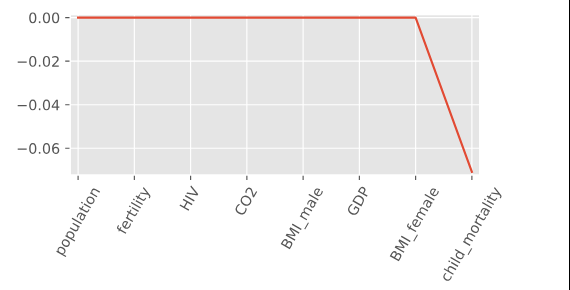

## Regularization II: Ridge

Lasso est idéal pour la sélection des fonctionnalités, mais lors de la création de modèles de régression, la régression Ridge doit être votre premier choix.

Rappelez-vous que lasso effectue la régularisation en ajoutant à la fonction de perte un terme de pénalité de la valeur absolue de chaque coefficient multiplié par un alpha. Ceci est également appelé régularisation L1 car le terme de régularisation est la norme L1 des coefficients. Ce n'est pas la seule façon de régulariser, cependant.

Si au lieu de cela vous preniez la somme des valeurs au carré des coefficients multipliés par une valeur alpha - comme dans la régression Ridge, vous calculeriez la norme L2. Dans cet exercice, vous vous exercerez à adapter des modèles de régression de crête sur une plage de différents alphas et à tracer les scores R2 validés pour chacun d'eux, à l'aide de la fonction que nous avons définie pour vous, qui trace le score R2 ainsi que l'erreur type pour chaque alpha:

In [159]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

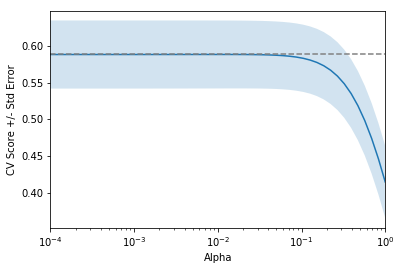

In [160]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

# Metrics for classification

Au chapitre 1, vous avez évalué les performances de votre classifieur k-NN en fonction de sa précision. Cependant, comme Andy en a parlé, l’exactitude n’est pas toujours une mesure informative. Dans cet exercice, vous allez approfondir l'évaluation des performances des classificateurs binaires en calculant une matrice de confusion et en générant un rapport de classification.

Vous avez peut-être remarqué dans la vidéo que le rapport de classification était composé de trois lignes et d'une colonne de support supplémentaire. Le support indique le nombre d’échantillons de la réponse vraie qui se trouvent dans cette classe. Par conséquent, dans l’exemple vidéo, le support correspond au nombre de républicains ou de démocrates dans l’ensemble de tests sur lequel le rapport de classification a été calculé. Les colonnes précision, rappel et score f1 ont ensuite donné les métriques respectives pour cette classe particulière.

Ici, vous travaillerez avec le jeu de données PIMA Indians obtenu à partir du référentiel UCI Machine Learning. L'objectif est de prédire si une patiente donnée contractera le diabète en fonction de caractéristiques telles que l'IMC, l'âge et le nombre de grossesses. C'est donc un problème de classification binaire. Une valeur cible de 0 indique que le patient n'a pas de diabète, tandis qu'une valeur de 1 indique que le patient est atteint de diabète. Comme dans les chapitres 1 et 2, le jeu de données a été prétraité pour traiter les valeurs manquantes.

In [161]:
df = pd.read_csv('diabetes.csv')

In [162]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [164]:
X = df.drop('diabetes', axis=1)

In [165]:
X.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age'],
      dtype='object')

In [166]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [167]:
y = df['diabetes']

In [169]:
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [170]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



## Building a logistic regression model

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Plotting an ROC curve

Les rapports de classification et les matrices de confusion sont d'excellentes méthodes pour évaluer quantitativement les performances des modèles, tandis que les courbes ROC permettent d'évaluer visuellement les modèles. La plupart des classificateurs de scikit-learn utilisent une méthode .predict_proba () qui renvoie la probabilité qu'un échantillon donné appartienne à une classe particulière. Après avoir construit un modèle de régression logistique, vous allez maintenant évaluer ses performances en traçant une courbe ROC. Ce faisant, vous utiliserez la méthode .predict_proba () et vous familiariserez avec ses fonctionnalités.

Ici, vous continuerez à travailler avec le jeu de données sur le diabète des Indiens PIMA. Le classificateur a déjà été ajusté aux données d'apprentissage et est disponible sous forme de journal.

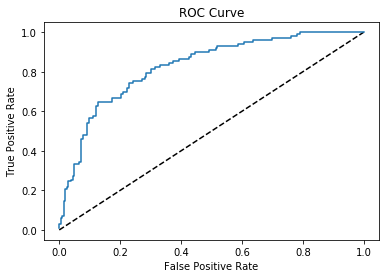

In [172]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## AUC computation

Plus la surface au-dessous de la ligne est grande mieux c'est.

In [174]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, scoring='roc_auc', cv=5)

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8268608414239483
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80796296 0.81944444 0.86603774 0.85037736]


# Hyperparameter tuning with GridSearchCV

La recherche en grille consiste à essayer différentes combinaisons sur nos paramètres et à effectuer une cross_validation afin de déterminer le paramètre offrant les meilleures performances.

In [175]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


# Hyperparameter tuning with RandomizedSearchCV

GridSearchCV peut être coûteux en calcul, en particulier si vous effectuez une recherche sur un grand espace d'hyperparamètre et que vous utilisez plusieurs hyperparamètres. Une solution à ce problème consiste à utiliser RandomizedSearchCV, dans lequel toutes les valeurs d'hyperparamètre ne sont pas testées. Au lieu de cela, un nombre fixe de paramètres d'hyperparamètre est échantillonné à partir des distributions de probabilité spécifiées. Vous vous exercerez à utiliser RandomizedSearchCV dans cet exercice et vous verrez comment cela fonctionne.

Ici, vous serez également initié à un nouveau modèle: l'arbre de décision. Ne vous inquiétez pas des détails du fonctionnement de ce modèle. Tout comme k-NN, la régression linéaire et la régression logistique, les arbres de décision dans les méthodes scikit-learn ont les méthodes .fit () et .predict () que vous pouvez utiliser exactement de la même manière qu'auparavant. Les arbres de décision ont de nombreux paramètres qui peuvent être ajustés, tels que max_features, max_depth et min_samples_leaf: cela en fait un cas d'utilisation idéal pour RandomizedSearchCV.

In [176]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 0.7395833333333334


# Hold-out set in practice I: Classification

In [177]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


# Hold-out set in practice II: Regression

Vous souvenez-vous de la régression de lasso et de crête du chapitre précédent? Lasso a utilisé la pénalité L1 pour se régulariser, alors que Ridge a utilisé la pénalité L2. Il existe un autre type de régression régularisée appelée filet élastique. Dans la régularisation nette élastique, le terme de pénalité est une combinaison linéaire des pénalités L1 et L2:

    a∗L1+b∗L2
    
Dans scikit-learn, ce terme est représenté par le paramètre 'l1 ratio': un 'l1 ratio' égal à 1 correspond à une pénalité L1 et toute valeur inférieure correspond à une combinaison de L1 et L2.

In [179]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split


# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\skle

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702679
Tuned ElasticNet MSE: 0.16664179543611016


c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Preprocessing data

## Encoding dummy variables

Changer les variables catégoriques en numéros selon une séquence unique en suivant la méthode One-hot Encoding.

In [180]:
df_auto = pd.read_csv('auto.csv') 

In [181]:
df_auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [182]:
df_origin = pd.get_dummies(df_auto)

In [184]:
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [185]:
df_origin = df_origin.drop('origin_Asia', axis=1)
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


## Exploring categorical features

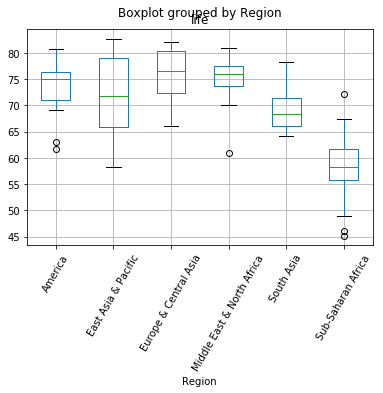

In [187]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

## Creating dummy variables

In [188]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [195]:
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [196]:
X = df_region.drop('life', axis=1).values

In [197]:
X

array([[3.4811059e+07, 2.7300000e+00, 1.0000000e-01, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9842251e+07, 6.4300000e+00, 2.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [4.0381860e+07, 2.2400000e+00, 5.0000000e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [8.6589342e+07, 1.8600000e+00, 4.0000000e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3114579e+07, 5.8800000e+00, 1.3600000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3495462e+07, 3.8500000e+00, 1.5100000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [198]:
y = df_region['life'].values

In [199]:
y

array([75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1,
       79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2,
       56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8,
       78.7, 61. , 74. , 70.1, 74.1, 56.7, 60.4, 74. , 65.7, 79.4, 81. ,
       57.5, 62.2, 72.1, 80. , 62.7, 79.5, 70.8, 58.3, 51.3, 63. , 61.7,
       70.9, 73.8, 82. , 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6,
       66.1, 61.5, 72.3, 77.6, 45.2, 61. , 72. , 80.7, 63.4, 51.4, 74.5,
       78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55. , 60.8,
       68.6, 80.3, 80.2, 75.2, 59.7, 58. , 80.7, 74.6, 64.1, 77.1, 58.2,
       73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4,
       55.9, 80.9, 74.8, 78.5, 56.7, 55. , 81.1, 74.3, 67.4, 69.1, 46.1,
       81.1, 81.9, 69.5, 59.7, 74.1, 60. , 71.3, 76.5, 75.1, 57.2, 68.2,
       79.5, 78.2, 76. , 68.7, 75.4, 52. , 49. ])

## Regression with categorical features

In [200]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


## Dropping missing values

In [221]:
df = pd.read_csv('votes.csv')

In [222]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


## Imputing missing data in a ML Pipeline 

In [219]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

In [223]:
df.replace({'n': 0}, inplace=True)
df.replace({'y': 1}, inplace=True)

In [224]:
y = df['party']
X = df.drop('party', axis=1)

In [226]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.97      0.97      0.97        36
 republican       0.97      0.97      0.97        34

avg / total       0.97      0.97      0.97        70



## Centering and scaling your data

In [241]:
df = pd.read_csv('white-wine.csv')

In [242]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [244]:
#  If 'quality' is less than 5, the target variable is 1, and otherwise, it is 0.
df.quality = np.where(df['quality']<5, 1, 0)

In [247]:
df.tail(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4878,6.2,0.530,0.02,0.90,0.035,6.0,81.0,0.99234,3.24,0.35,9.500000,1
4879,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,0
4880,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,0
4881,5.0,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.400000,0
4882,5.5,0.320,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.700000,0
4883,4.9,0.470,0.17,1.90,0.035,60.0,148.0,0.98964,3.27,0.35,11.500000,0
4884,6.5,0.330,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.600000,0
4885,6.6,0.340,0.40,8.10,0.046,68.0,170.0,0.99494,3.15,0.50,9.550000,0
4886,6.2,0.210,0.28,5.70,0.028,45.0,121.0,0.99168,3.21,1.08,12.150000,0
4887,6.2,0.410,0.22,1.90,0.023,5.0,56.0,0.98928,3.04,0.79,13.000000,0


In [248]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [249]:
X = df.drop('quality', axis=1).values

In [250]:
X[:20]

array([[7.0000e+00, 2.7000e-01, 3.6000e-01, 2.0700e+01, 4.5000e-02,
        4.5000e+01, 1.7000e+02, 1.0010e+00, 3.0000e+00, 4.5000e-01,
        8.8000e+00],
       [6.3000e+00, 3.0000e-01, 3.4000e-01, 1.6000e+00, 4.9000e-02,
        1.4000e+01, 1.3200e+02, 9.9400e-01, 3.3000e+00, 4.9000e-01,
        9.5000e+00],
       [8.1000e+00, 2.8000e-01, 4.0000e-01, 6.9000e+00, 5.0000e-02,
        3.0000e+01, 9.7000e+01, 9.9510e-01, 3.2600e+00, 4.4000e-01,
        1.0100e+01],
       [7.2000e+00, 2.3000e-01, 3.2000e-01, 8.5000e+00, 5.8000e-02,
        4.7000e+01, 1.8600e+02, 9.9560e-01, 3.1900e+00, 4.0000e-01,
        9.9000e+00],
       [7.2000e+00, 2.3000e-01, 3.2000e-01, 8.5000e+00, 5.8000e-02,
        4.7000e+01, 1.8600e+02, 9.9560e-01, 3.1900e+00, 4.0000e-01,
        9.9000e+00],
       [8.1000e+00, 2.8000e-01, 4.0000e-01, 6.9000e+00, 5.0000e-02,
        3.0000e+01, 9.7000e+01, 9.9510e-01, 3.2600e+00, 4.4000e-01,
        1.0100e+01],
       [6.2000e+00, 3.2000e-01, 1.6000e-01, 7.0000e+00, 4.

In [251]:
y = df['quality'].values

In [252]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [253]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


## Centering and scaling in a pipeline

In [254]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


# Bringing it all together I: Pipeline for classification

In [255]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9693877551020408
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       951
          1       0.43      0.10      0.17        29

avg / total       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


# Bringing it all together II: Pipeline for regression

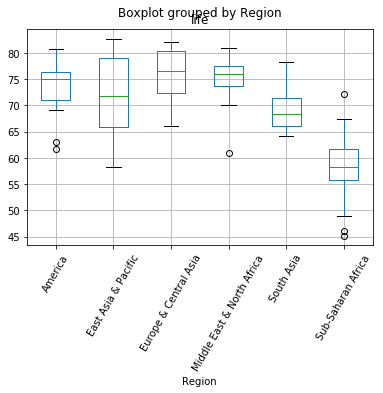

In [261]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

In [262]:
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [263]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [264]:
X = df_region.drop('life', axis=1).values

In [266]:
y = df_region['life'].values

In [268]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016549771037


**Sources**: All the rights reserved to : 
- [DataCamp Supervised Learning](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn)